In [1]:
using LinearAlgebra, Polynomials, Plots

In [2]:
deg=10
steps=100
dW=randn(deg+1,steps)
W=cumsum(dW,dims=2)
EndVec=W[:,steps]
scalingvec=[0;(1:steps)/steps]
scalingmat=(scalingvec * EndVec')'
W=[zeros(deg+1)';W']'
B=W-scalingmat

11×101 Matrix{Float64}:
 0.0  -1.37933   -1.44492    -2.18179     …   0.668512   0.240032  0.0
 0.0  -1.30134   -1.35524    -2.01709         0.671175  -0.382407  0.0
 0.0   0.197797  -0.408082    0.138087        0.478826   0.47038   0.0
 0.0  -0.305479  -0.0379393   0.295126       -2.6515    -2.04678   0.0
 0.0   2.14087    1.76435     0.828303       -2.38054   -1.63054   0.0
 0.0   0.197873   1.73654     1.8335      …   0.917215   0.67688   0.0
 0.0  -0.699573  -1.17953    -3.19275         2.05497    0.718966  0.0
 0.0   0.535246   2.1552      0.00532824     -1.87958   -0.975229  0.0
 0.0  -0.489824   1.2953      0.199311       -1.26243   -0.721467  0.0
 0.0  -0.712969  -1.4045     -2.13327         0.259977  -0.130552  0.0
 0.0  -0.323683  -1.40783    -1.81968     …  -0.949864   0.405069  0.0

In [66]:
function brownian_bridge(deg,steps,noncentral::Bool=false)
    dW=randn(deg,steps)/(steps)^0.5
    W=cumsum(dW,dims=2)
    EndVec=W[:,steps]
    scalingvec=[0;(1:steps)/steps]
    scalingmat=(scalingvec * EndVec')'
    W=[zeros(deg)';W']'
    B=W-scalingmat
    if noncentral==true
        B = [B ;ones(1,steps+1)]
    end
    return B
end

brownian_bridge (generic function with 2 methods)

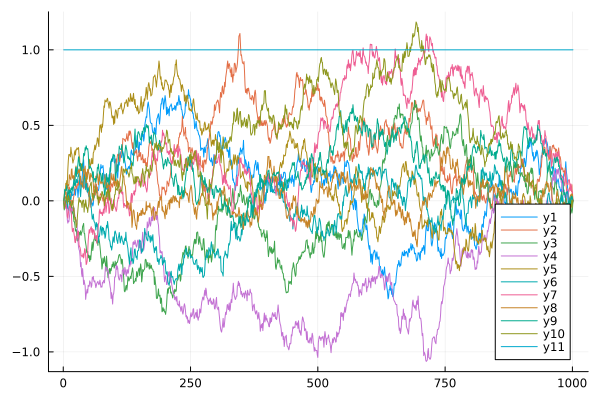

In [74]:
plot(brownian_bridge(10,1000,true)')


In [68]:
function root_array(M)
    deg=size(M)[1]-1
    K=[binomial(deg,i)^(1/2) for i in 0:deg]
    return [roots(Polynomial(K .* M[:,i])) for i in 1:size(M)[2]]
end

root_array (generic function with 1 method)

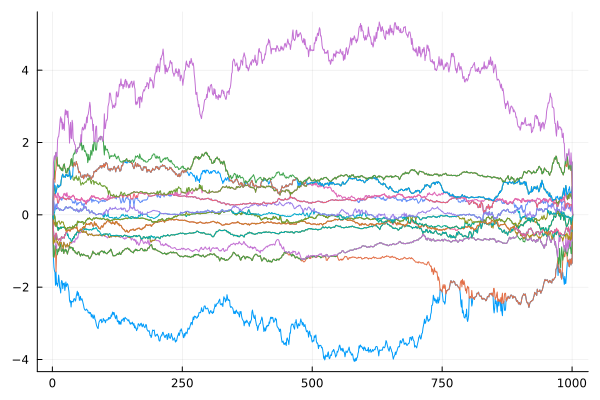

In [81]:
R=root_array(brownian_bridge(20,1000,true))
f3(A) = mapslices(norm, A, dims=2)
plot(f3(brownian_bridge(10,100,true)'))
Rprime=mapreduce(permutedims, vcat, R)
plot(real.(Rprime),legend=false)

In [64]:
R

101-element Vector{Vector{ComplexF64}}:
 [-1.0000000000000009 + 0.0im, -0.8090169943749472 - 0.587785252292473im, -0.8090169943749472 + 0.587785252292473im, -0.3090169943749477 - 0.9510565162951542im, -0.3090169943749477 + 0.9510565162951542im, 0.30901699437494734 - 0.9510565162951535im, 0.30901699437494734 + 0.9510565162951535im, 0.8090169943749477 - 0.5877852522924732im, 0.8090169943749477 + 0.5877852522924732im, 0.9999999999999999 + 0.0im]
 [-1.2738771407434357 - 0.13276493323800967im, -1.2738771407434357 + 0.13276493323800967im, -0.7386622814782092 + 0.0im, -0.2816602648255987 - 0.8964832011778764im, -0.2816602648255987 + 0.8964832011778764im, 0.22894834917709073 - 0.9735306518672469im, 0.22894834917709073 + 0.9735306518672469im, 0.7809815110904975 + 0.0im, 0.8177010990424716 - 0.7265580807467679im, 0.8177010990424716 + 0.7265580807467679im]
 [-2.2040430646692584 + 0.0im, -0.7053747166218206 - 0.3379901235510532im, -0.7053747166218206 + 0.3379901235510532im, -0.20437357388453203 - 

In [34]:
Polynomial([0;0;1])

Polynomial(x^2)

In [35]:
Rprime=mapreduce(permutedims, vcat, R)

101×10 Matrix{ComplexF64}:
       0.0+0.0im             0.0+0.0im       …       0.0+0.0im
 -0.479938-0.172608im  -0.479938+0.172608im     0.430661+0.119483im
 -0.424214-0.123556im  -0.424214+0.123556im      0.44619+0.130132im
 -0.449045+0.0im       -0.351117-0.305213im     0.414092+0.12786im
 -0.517578+0.0im       -0.411944-0.317096im     0.461675+0.0im
  -0.46599+0.0im       -0.416996-0.280155im  …   0.46963+0.0im
 -0.440114-0.263667im  -0.440114+0.263667im     0.499501+0.0im
  -0.44423-0.265719im   -0.44423+0.265719im     0.531775+0.0im
 -0.474649+0.0im       -0.467615-0.287324im     0.567781+0.0im
 -0.501461+0.0im       -0.474305-0.298976im     0.576268+0.0im
 -0.528213+0.0im       -0.483173-0.310713im  …  0.582514+0.0im
 -0.570462+0.0im        -0.48456-0.33892im      0.595541+0.0im
 -0.606574+0.0im        -0.50317-0.360843im     0.624895+0.0im
          ⋮                                  ⋱  
 -0.475624-0.150377im  -0.475624+0.150377im     0.510659+0.164027im
 -0.464946-0.143919im  

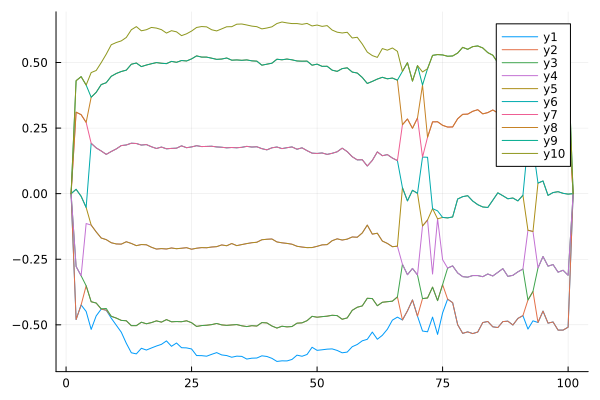

In [36]:
plot(real.(Rprime))